In [5]:
# import library
import pickle
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import poisson
from scipy.stats import norm

# open the file of interest, and use pickle loading
infile = open ("qcd_100000_pt_250_500.pkl",'rb')
qcd = pickle.load(infile)
infile = open ("higgs_100000_pt_250_500.pkl",'rb')
higg = pickle.load(infile)
# list all keys of the files
#print(qcd.keys())
#print(higg.keys())
plt.rcParams["figure.figsize"] = (15,12)


1
--------------------------------------
Make a stacked histogram plot for the feature variable: mass

    -Evaluate expected significance without any event selection.

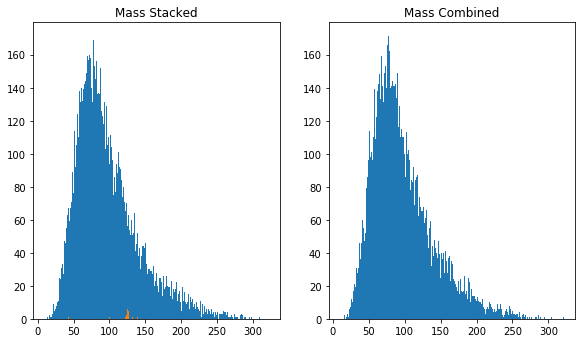

5 sigma detection boundry = 20711.0
significance (poisson) = 0.7112259282313185
significance (N/sqrt(N)) = 0.7071067811865475


In [6]:
qcd_mass = qcd['mass']
higg_mass = higg['mass']
plt.subplot(2, 3, 1)
plt.hist(qcd_mass[0:20000],500)
plt.title('Mass Stacked')
plt.hist(higg_mass[0:100],500)
plt.subplot(2, 3, 2)
combined = np.append(qcd_mass[0:20000],higg_mass[0:100])
plt.hist(combined,500)
plt.title('Mass Combined')
plt.show()
mu = 20000
sig1 = poisson.ppf((norm.cdf(5)),mu)
sig2 = abs(norm.ppf(1-poisson.cdf(20100,mu)))
print("5 sigma detection boundry =",sig1)
print("significance (poisson) =",sig2)
sig3 = 100/(np.sqrt(20000))
print("significance (N/sqrt(N)) =", sig3)

Above we can see that, with a random selection and no event selection, we can only get a sigma of ~0.7 by counting # of events.

On a side note, the two methods of calculating significance [poisson vs N/sqrt(N)] gave very similiar results.

2
-----------------
Identify mass cuts to optimize the expected significance.

We will be using the full data set to find the best cuts, but normalizing the distrabution to 20000 qcd : 100 higgs after the cuts are made.

Below we have cuts of increasing specificity and resulting in higher and higher significance. alothough notably, even a cut with a width of 1 only gave a significance of ~2.8

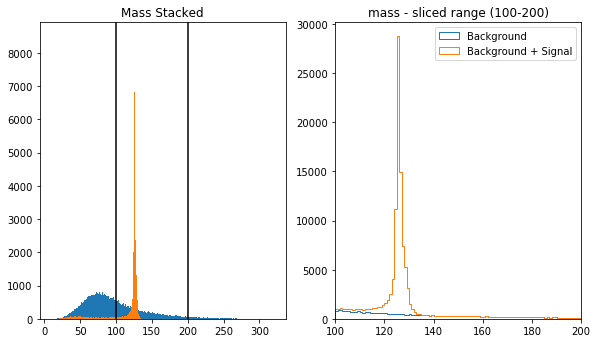

5 sigma detection boundry(for 20000:100 set) = 7397.0
significance (poisson)(for 20000:100 set) = 1.0117355239396424
significance (N/sqrt(N))(for 20000:100 set) = 1.0171287727512313


In [7]:
qcd_mass = qcd['mass']
higg_mass = higg['mass']
combined = np.append(qcd_mass,higg_mass)
qcd_hist = plt.hist(qcd_mass,1,histtype = 'step',range = (100,200))
comb_hist = plt.hist(higg_mass,1,histtype = 'step',range = (100,200))
plt.subplot(2, 3, 1)
plt.hist(qcd_mass,500)
plt.title('Mass Stacked')
plt.hist(higg_mass,500)
plt.axvline(x=100,color = "black")
plt.axvline(x=200,color = "black")

plt.subplot(2, 3, 2)
plt.hist(qcd_mass,100,histtype = 'step',range = (100,200),label = "Background")
plt.hist(combined,100,histtype = 'step',range = (100,200),label = "Background + Signal")
plt.title('mass - sliced range (100-200)')
plt.xlim(100,200)

plt.legend()

plt.show()

ccc = comb_hist[0]
bbb = qcd_hist[0]
mu = bbb[0]
sigsize = ccc[0]
normalized_mu = (mu/100000)*20000
normalized_sigsize = (sigsize/100000)*100
norm_combined = normalized_sigsize+normalized_mu
sig1 = poisson.ppf((norm.cdf(5)),normalized_mu)
sig2 = abs(norm.ppf(1-poisson.cdf((norm_combined),normalized_mu)))
print("5 sigma detection boundry(for 20000:100 set) =",sig1) 
print("significance (poisson)(for 20000:100 set) =",sig2)
sig3 = (norm_combined-normalized_mu)/(np.sqrt(normalized_mu))
print("significance (N/sqrt(N))(for 20000:100 set) =", sig3)

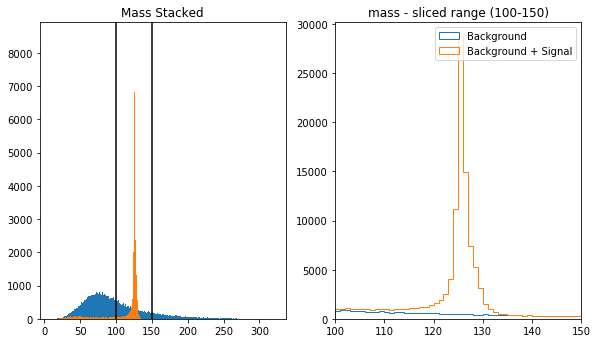

5 sigma detection boundry (for 20000:100 set) = 5545.0
significance (poisson)(for 20000:100 set) = 1.1730905144404775
significance (N/sqrt(N))(for 20000:100 set) = 1.1801609756267177


In [8]:
qcd_mass = qcd['mass']
higg_mass = higg['mass']
qcd_hist = plt.hist(qcd_mass,1,histtype = 'step',range = (100,150))
comb_hist = plt.hist(higg_mass,1,histtype = 'step',range = (100,150))
plt.subplot(2, 3, 1)
plt.hist(qcd_mass,500)
plt.title('Mass Stacked')
plt.hist(higg_mass,500)
plt.axvline(x=100,color = "black")
plt.axvline(x=150,color = "black")

plt.subplot(2, 3, 2)
plt.hist(qcd_mass,50,histtype = 'step',range = (100,150),label = "Background")
plt.hist(combined,50,histtype = 'step',range = (100,150),label = "Background + Signal")
plt.title('mass - sliced range (100-150)')
plt.xlim(100,150)
plt.legend()
plt.show()

ccc = comb_hist[0]
bbb = qcd_hist[0]
mu = bbb[0]
sigsize = ccc[0]
normalized_mu = (mu/100000)*20000
normalized_sigsize = (sigsize/100000)*100
norm_combined = normalized_sigsize+normalized_mu
sig1 = poisson.ppf((norm.cdf(5)),normalized_mu)
sig2 = abs(norm.ppf(1-poisson.cdf((norm_combined),normalized_mu)))
print("5 sigma detection boundry (for 20000:100 set) =",sig1) 
print("significance (poisson)(for 20000:100 set) =",sig2)
sig3 = (norm_combined-normalized_mu)/(np.sqrt(normalized_mu))
print("significance (N/sqrt(N))(for 20000:100 set) =", sig3)

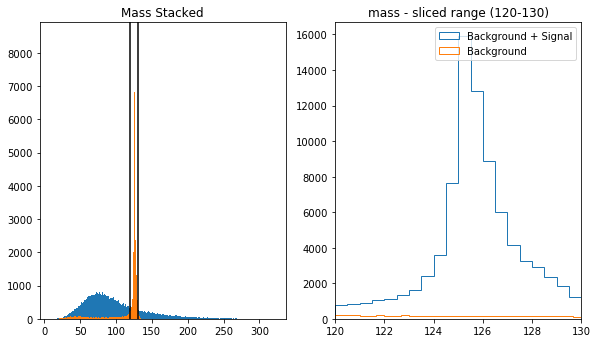

5 sigma detection boundry (for 20000:100 set) = 1141.0
significance (poisson)(for 20000:100 set) = 2.411688648925931
significance (N/sqrt(N))(for 20000:100 set) = 2.4225963501794707


In [17]:
qcd_mass = qcd['mass']
higg_mass = higg['mass']
qcd_hist = plt.hist(qcd_mass,1,histtype = 'step',range = (120,130))
comb_hist = plt.hist(higg_mass,1,histtype = 'step',range = (120,130))
plt.subplot(2, 3, 1)
plt.hist(qcd_mass,500)
plt.title('Mass Stacked')
plt.hist(higg_mass,500)
plt.axvline(x=120,color = "black")
plt.axvline(x=130,color = "black")

plt.subplot(2, 3, 2)
plt.hist(combined,20,histtype = 'step',range = (120,130),label = "Background + Signal")
plt.hist(qcd_mass,30,histtype = 'step',range = (120,130),label = "Background")
plt.title('mass - sliced range (120-130)')
plt.xlim(120,130)
plt.legend()
plt.show()

ccc = comb_hist[0]
bbb = qcd_hist[0]
mu = bbb[0]
sigsize = ccc[0]
normalized_mu = (mu/100000)*20000
normalized_sigsize = (sigsize/100000)*100
norm_combined = normalized_sigsize+normalized_mu
sig1 = poisson.ppf((norm.cdf(5)),normalized_mu)
sig2 = abs(norm.ppf(1-poisson.cdf((norm_combined),normalized_mu)))
print("5 sigma detection boundry (for 20000:100 set) =",sig1) 
print("significance (poisson)(for 20000:100 set) =",sig2)
sig3 = (norm_combined-normalized_mu)/(np.sqrt(normalized_mu))
print("significance (N/sqrt(N))(for 20000:100 set) =", sig3)

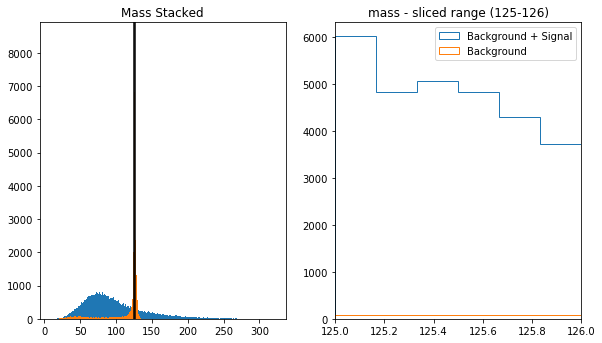

5 sigma detection boundry (for 20000:100 set) = 151.0
significance (poisson)(for 20000:100 set) = 2.7407644200995014
significance (N/sqrt(N))(for 20000:100 set) = 2.862153037534321


In [9]:
qcd_mass = qcd['mass']
higg_mass = higg['mass']
qcd_hist = plt.hist(qcd_mass,1,histtype = 'step',range = (125,126))
comb_hist = plt.hist(higg_mass,1,histtype = 'step',range = (125,126))
plt.subplot(2, 3, 1)
plt.hist(qcd_mass,500)
plt.title('Mass Stacked')
plt.hist(higg_mass,500)
plt.axvline(x=125,color = "black")
plt.axvline(x=127,color = "black")

plt.subplot(2, 3, 2)
plt.hist(combined,6,histtype = 'step',range = (125,126),label = "Background + Signal")
plt.hist(qcd_mass,6,histtype = 'step',range = (125,126),label = "Background")
plt.title('mass - sliced range (125-126)')
plt.xlim(125,126)
plt.legend()
plt.show()

ccc = comb_hist[0]
bbb = qcd_hist[0]
mu = bbb[0]
sigsize = ccc[0]
normalized_mu = (mu/100000)*20000
normalized_sigsize = (sigsize/100000)*100
norm_combined = normalized_sigsize+normalized_mu
sig1 = poisson.ppf((norm.cdf(5)),normalized_mu)
sig2 = abs(norm.ppf(1-poisson.cdf((norm_combined),normalized_mu)))
print("5 sigma detection boundry (for 20000:100 set) =",sig1) 
print("significance (poisson)(for 20000:100 set) =",sig2)
sig3 = (norm_combined-normalized_mu)/(np.sqrt(normalized_mu))
print("significance (N/sqrt(N))(for 20000:100 set) =", sig3)

3
-------------
Make stacked histogram plots for the rest of the features

Set A of plots without any event selection
- Can you identify another feature as discriminative as mass feature (i.e. equal or better significance after feature cut)?

Set B of plots with your optimal mass cuts
- Can you identify additional feature to further imrpove expected signifiance?


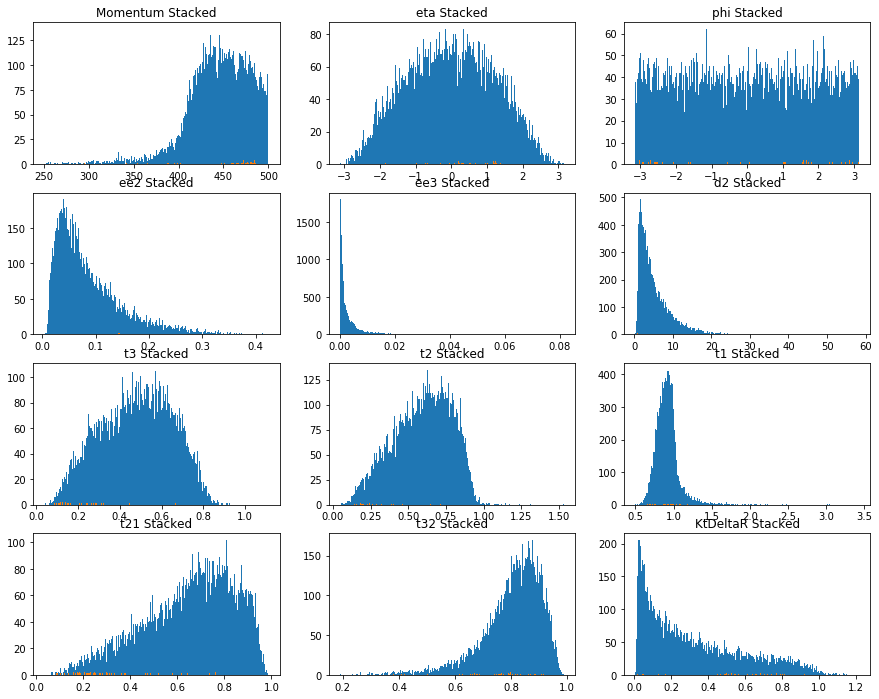

In [10]:
qcd_pt = qcd['pt']
higg_pt = higg['pt']
plt.subplot(4, 3, 1)
plt.hist(qcd_pt[0:20000],500)
plt.title('Momentum Stacked')
plt.hist(higg_pt[0:100],500)

qcd_eta = qcd['eta']
higg_eta = higg['eta']
plt.subplot(4, 3, 2)
plt.hist(qcd_eta[0:20000],500)
plt.title('eta Stacked')
plt.hist(higg_eta[0:100],500)

qcd_phi = qcd['phi']
higg_phi = higg['phi']
plt.subplot(4, 3, 3)
plt.hist(qcd_phi[0:20000],500)
plt.title('phi Stacked')
plt.hist(higg_phi[0:100],500)

qcd_ee2 = qcd['ee2']
higg_ee2 = higg['ee2']
plt.subplot(4, 3, 4)
plt.hist(qcd_ee2[0:20000],500)
plt.title('ee2 Stacked')
plt.hist(higg_ee2[0:100],500)

qcd_ee3 = qcd['ee3']
higg_ee3 = higg['ee3']
plt.subplot(4, 3, 5)
plt.hist(qcd_ee3[0:20000],500)
plt.title('ee3 Stacked')
plt.hist(higg_ee3[0:100],500)

qcd_d2 = qcd['d2']
higg_d2 = higg['d2']
plt.subplot(4, 3, 6)
plt.hist(qcd_d2[0:20000],500)
plt.title('d2 Stacked')
plt.hist(higg_d2[0:100],500)

qcd_t3 = qcd['t3']
higg_t3 = higg['t3']
plt.subplot(4, 3, 7)
plt.hist(qcd_t3[0:20000],500)
plt.title('t3 Stacked')
plt.hist(higg_t3[0:100],500)

qcd_t2 = qcd['t2']
higg_t2 = higg['t2']
plt.subplot(4, 3, 8)
plt.hist(qcd_t2[0:20000],500)
plt.title('t2 Stacked')
plt.hist(higg_t2[0:100],500)

qcd_t1 = qcd['t1']
higg_t1 = higg['t1']
plt.subplot(4, 3, 9)
plt.hist(qcd_t1[0:20000],500)
plt.title('t1 Stacked')
plt.hist(higg_t1[0:100],500)

qcd_t21 = qcd['t21']
higg_t21 = higg['t21']
plt.subplot(4, 3, 10)
plt.hist(qcd_t21[0:20000],500)
plt.title('t21 Stacked')
plt.hist(higg_t21[0:100],500)

qcd_t32 = qcd['t32']
higg_t32 = higg['t32']
plt.subplot(4, 3, 11)
plt.hist(qcd_t32[0:20000],500)
plt.title('t32 Stacked')
plt.hist(higg_t32[0:100],500)

qcd_KtDeltaR = qcd['KtDeltaR']
higg_KtDeltaR = higg['KtDeltaR']
plt.subplot(4, 3, 12)
plt.hist(qcd_KtDeltaR[0:20000],500)
plt.title('KtDeltaR Stacked')
plt.hist(higg_KtDeltaR[0:100],500)

plt.show()

Above is Set A, None of the above apear to be as discriminitive as mass. We will have to make the mass cuts first to see if any are particularly viable. 

In [11]:
qcdm = qcd[0:20000]
higgm = higg[0:100]
higgh = higgm[higgm["mass"] >= 125]
qcdh = qcdm[qcdm["mass"] >= 125]
higgl = higgh[higgh["mass"] <= 126]
qcdl = qcdh[qcdh["mass"] <= 126]
#print(higgl)
#print(qcdl)

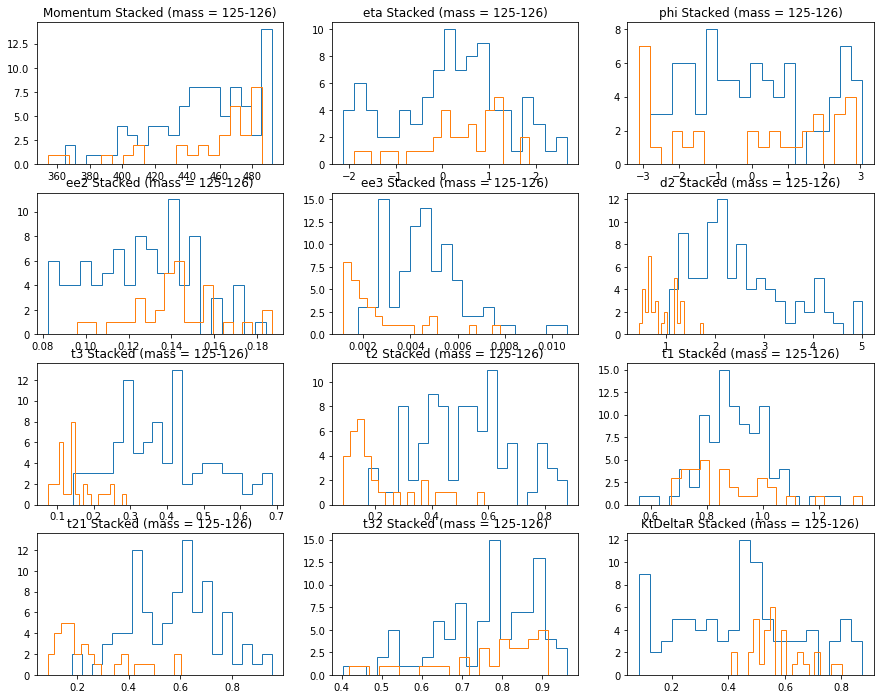

In [12]:

binsize = 20

plt.subplot(4, 3, 1)
plt.hist(qcdl['pt'],binsize,histtype = 'step')
plt.title('Momentum Stacked (mass = 125-126)')
plt.hist(higgl['pt'],binsize,histtype = 'step')


plt.subplot(4, 3, 2)
plt.hist(qcdl['eta'],binsize,histtype = 'step')
plt.title('eta Stacked (mass = 125-126)')
plt.hist(higgl['eta'],binsize,histtype = 'step')


plt.subplot(4, 3, 3)
plt.hist(qcdl['phi'],binsize,histtype = 'step')
plt.title('phi Stacked (mass = 125-126)')
plt.hist(higgl['phi'],binsize,histtype = 'step')

plt.subplot(4, 3, 4)
plt.hist(qcdl['ee2'],binsize,histtype = 'step')
plt.title('ee2 Stacked (mass = 125-126)')
plt.hist(higgl['ee2'],binsize,histtype = 'step')

plt.subplot(4, 3, 5)
plt.hist(qcdl['ee3'],binsize,histtype = 'step')
plt.title('ee3 Stacked (mass = 125-126)')
plt.hist(higgl['ee3'],binsize,histtype = 'step')

plt.subplot(4, 3, 6)
plt.hist(qcdl['d2'],binsize,histtype = 'step')
plt.title('d2 Stacked (mass = 125-126)')
plt.hist(higgl['d2'],binsize,histtype = 'step')

plt.subplot(4, 3, 7)
plt.hist(qcdl['t3'],binsize,histtype = 'step')
plt.title('t3 Stacked (mass = 125-126)')
plt.hist(higgl['t3'],binsize,histtype = 'step')

plt.subplot(4, 3, 8)
plt.hist(qcdl['t2'],binsize,histtype = 'step')
plt.title('t2 Stacked (mass = 125-126)')
plt.hist(higgl['t2'],binsize,histtype = 'step')

plt.subplot(4, 3, 9)
plt.hist(qcdl['t1'],binsize,histtype = 'step')
plt.title('t1 Stacked (mass = 125-126)')
plt.hist(higgl['t1'],binsize,histtype = 'step')

plt.subplot(4, 3, 10)
plt.hist(qcdl['t21'],binsize,histtype = 'step')
plt.title('t21 Stacked (mass = 125-126)')
plt.hist(higgl['t21'],binsize,histtype = 'step')

plt.subplot(4, 3, 11)
plt.hist(qcdl['t32'],binsize,histtype = 'step')
plt.title('t32 Stacked (mass = 125-126)')
plt.hist(higgl['t32'],binsize,histtype = 'step')

plt.subplot(4, 3, 12)
plt.hist(qcdl['KtDeltaR'],binsize,histtype = 'step')
plt.title('KtDeltaR Stacked (mass = 125-126)')
plt.hist(higgl['KtDeltaR'],binsize,histtype = 'step')

plt.show()

Above is Set B, after mass cuts (125-126) we can see a few contenders for a second parameter. d2 and t2 catch my eye. Their signals peak near zero and that seems like a usful range to measure in. 

4
----

optimize event selections using multiple features

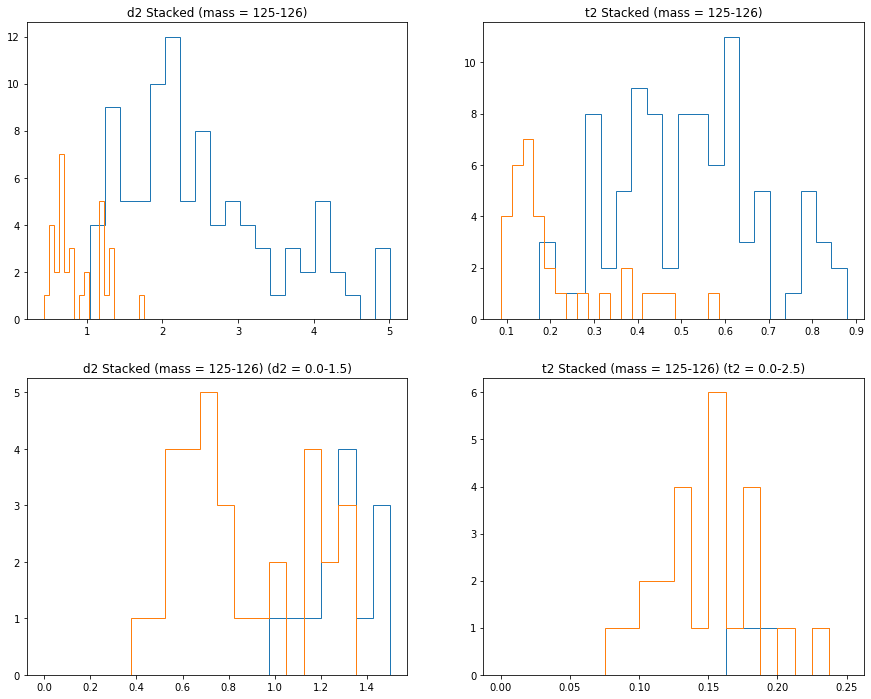

In [15]:
plt.subplot(2, 2, 1)
plt.hist(qcdl['d2'],binsize,histtype = 'step')
plt.title('d2 Stacked (mass = 125-126)')
plt.hist(higgl['d2'],binsize,histtype = 'step')

plt.subplot(2, 2, 2)
plt.hist(qcdl['t2'],binsize,histtype = 'step')
plt.title('t2 Stacked (mass = 125-126)')
plt.hist(higgl['t2'],binsize,histtype = 'step')

plt.subplot(2, 2, 3)
plt.hist(qcdl['d2'],binsize,histtype = 'step',range = (0,1.5))
plt.title('d2 Stacked (mass = 125-126) (d2 = 0.0-1.5)')
plt.hist(higgl['d2'],binsize,histtype = 'step',range = (0,1.5))

plt.subplot(2, 2, 4)
plt.hist(qcdl['t2'],binsize,histtype = 'step',range = (0,0.25))
plt.title('t2 Stacked (mass = 125-126) (t2 = 0.0-2.5)')
plt.hist(higgl['t2'],binsize,histtype = 'step',range = (0,0.25))
plt.show()

Above are d2, and t2 after the first mass cut. The second row of graphs is showing the second cut near the where the signals peak around zero.

This second cut significantly increased the significance of the measurements, up to ~7 sigma in both cases. My partner with High pt data got similiar results but ended up using a different second cutting permater, which might say something about how these parameters corrilate with pt. 

Below are the significance calculations for d2 and t2:

In [83]:
#qcd_hist = plt.hist(qcdl['d2'],1,histtype = 'step',range = (0,1.5))
#combined = np.append(higgl['d2'],qcdl['d2'])
#comb_hist = plt.hist(combined,1,histtype = 'step',range = (0,1.5))

ccc = comb_hist[0]
bbb = qcd_hist[0]
mu = bbb[0]
sigsize = ccc[0]
sig1 = poisson.ppf((norm.cdf(5)),mu)
sig2 = abs(norm.ppf(1-poisson.cdf((sigsize),mu)))
print("5 sigma detection boundry =",sig1) 
print("significance (poisson) =",sig2)
sig3 = (sigsize-mu)/(np.sqrt(mu))
print("significance (N/sqrt(N)) =", sig3)

5 sigma detection boundry = 35.0
significance (poisson) = 6.856797286821908
significance (N/sqrt(N)) = 8.597853041491051


In [108]:
#qcd_hist = plt.hist(qcdl['t2'],1,histtype = 'step',range = (0,0.3))
#combined = np.append(higgl['t2'],qcdl['t2'])
#comb_hist = plt.hist(combined,1,histtype = 'step',range = (0,0.3))

ccc = comb_hist[0]
bbb = qcd_hist[0]
mu = bbb[0]
sigsize = ccc[0]

sig1 = poisson.ppf((norm.cdf(5)),mu)
sig2 = abs(norm.ppf(1-poisson.cdf((sigsize),mu)))
print("5 sigma detection boundry =",sig1) 
print("significance (poisson) =",sig2)
sig3 = (sigsize-mu)/(np.sqrt(mu))
print("significance (N/sqrt(N)) =", sig3)

5 sigma detection boundry = 29.0
significance (poisson) = 6.282420992408149
significance (N/sqrt(N)) = 7.905694150420948


Lab 8 
----



In [17]:
#LAB 8 STUFF
high = pd.read_hdf("data_highLumi_pt_250_500.h5")
low = pd.read_hdf("data_lowLumi_pt_250_500.h5")
#print(high)
#print(low)

1-2)  High and Low luminosity data - Raw vs Event selected
---

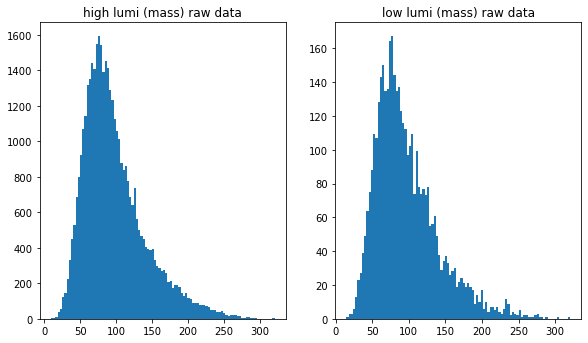

In [18]:
high_mass = high['mass']
low_mass = low['mass']

plt.subplot(2, 3, 1)
plt.hist(high_mass,100)
plt.title('high lumi (mass) raw data')

plt.subplot(2, 3, 2)
plt.hist(low_mass,100)
plt.title('low lumi (mass) raw data')
plt.show()


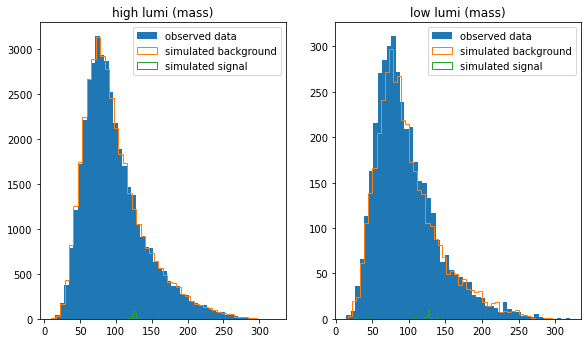

In [19]:
binsize_1 = 50
plt.subplot(2, 3, 1)
plt.hist(high_mass,binsize_1,label = "observed data")
plt.hist(qcd_mass[0:40000],binsize_1,histtype = 'step',label = "simulated background")
plt.hist(higg_mass[0:200],binsize_1,histtype = 'step',label = "simulated signal")
plt.title('high lumi (mass)')
plt.legend()
plt.subplot(2, 3, 2)
plt.hist(low_mass,binsize_1,label = "observed data")
plt.hist(qcd_mass[0:4038],binsize_1,histtype = 'step',label = "simulated background")
plt.hist(higg_mass[0:22],binsize_1,histtype = 'step',label = "simulated signal")
plt.title('low lumi (mass)')
plt.legend()
plt.show()

ABOVE: Observed data with normalized "expected" data plotted on top.

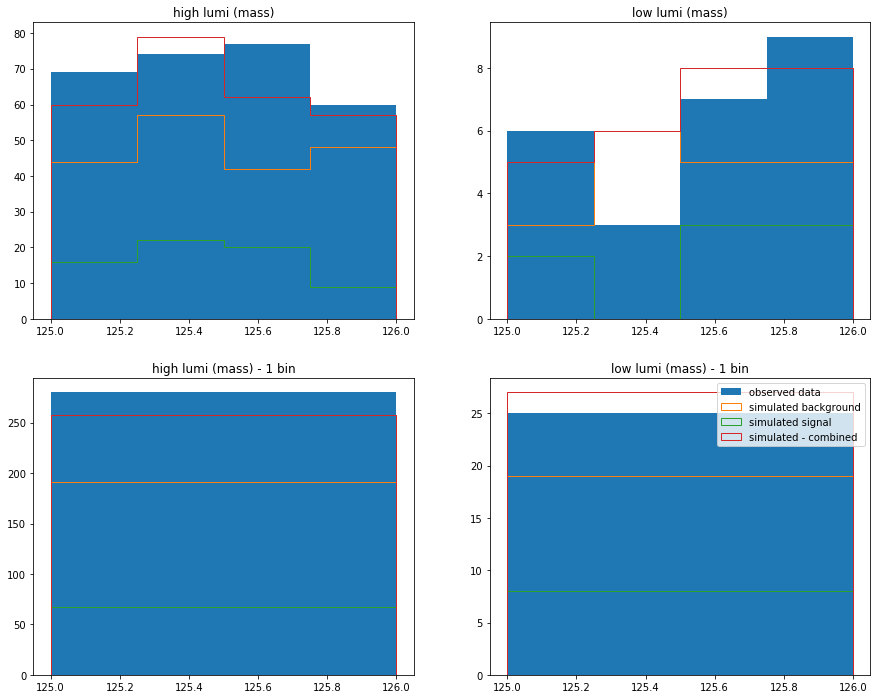

In [93]:
binsize_1 = 4
plt.subplot(2, 2, 1)
plt.hist(high_mass,binsize_1,range = (125,126),label = "observed data")
plt.hist(qcd_mass[0:40000],binsize_1,histtype = 'step',range = (125,126),label = "simulated background")
plt.hist(higg_mass[0:200],binsize_1,histtype = 'step',range = (125,126),label = "simulated signal")
plt.hist(
    np.append(qcd_mass[0:40000],higg_mass[0:200]),
    binsize_1,histtype = 'step',range = (125,126),label = "simulated - combined")
plt.title('high lumi (mass)')

plt.subplot(2, 2, 2)
plt.hist(low_mass,binsize_1,range = (125,126),label = "observed data")
plt.hist(qcd_mass[0:4038],binsize_1,histtype = 'step',range = (125,126),label = "simulated background")
plt.hist(higg_mass[0:22],binsize_1,histtype = 'step',range = (125,126),label = "simulated signal")
plt.hist(
    np.append(qcd_mass[0:4038],higg_mass[0:22]),
    binsize_1,histtype = 'step',range = (125,126),label = "simulated - combined")
plt.title('low lumi (mass)')
plt.subplot(2, 2, 3)
plt.hist(high_mass,1,range = (125,126),label = "observed data")
plt.hist(qcd_mass[0:40000],1,histtype = 'step',range = (125,126),label = "simulated background")
plt.hist(higg_mass[0:200],1,histtype = 'step',range = (125,126),label = "simulated signal")
plt.hist(
    np.append(qcd_mass[0:40000],higg_mass[0:200]),
    1,histtype = 'step',range = (125,126),label = "simulated - combined")
plt.title('high lumi (mass) - 1 bin')

plt.subplot(2, 2, 4)
plt.hist(low_mass,1,range = (125,126),label = "observed data")
plt.hist(qcd_mass[0:4038],1,histtype = 'step',range = (125,126),label = "simulated background")
plt.hist(higg_mass[0:22],1,histtype = 'step',range = (125,126),label = "simulated signal")
plt.hist(
    np.append(qcd_mass[0:4038],higg_mass[0:22]),
    1,histtype = 'step',range = (125,126),label = "simulated - combined")
plt.title('low lumi (mass) - 1 bin')
plt.legend()
plt.show()

ABOVE: Observed data with normalized "expected" data plotted on top - after mass cuts (125-126)

BELOW: Significance calculations for the above mass cuts - comparing observed data with simulated background data

In [21]:
#sig_hist = plt.hist(low_mass,1,range = (125,126))
#qcd_hist = plt.hist(qcd_mass[0:4038],1,range = (125,126))
ccc = sig_hist[0]
bbb = qcd_hist[0]
mu = bbb[0]
sigsize = ccc[0]
sig1 = poisson.ppf((norm.cdf(5)),mu)
sig2 = abs(norm.ppf(1-poisson.cdf((sigsize),mu)))
print("5 sigma detection boundry = ~",sig1)
print("significance (poisson) =",sig2)
#print(mu)

5 sigma detection boundry = ~ 44.0
significance (poisson) = 1.4529014589264047


After mass cuts (above), the low lumi data shows a very low significance. We will have to cut further to see if a signal is present.

In [23]:
#sig_hist1 = plt.hist(high_mass,1,range = (125,126))
#qcd_hist1 = plt.hist(qcd_mass[0:40000],1,range = (125,126))
ccc = sig_hist1[0]
bbb = qcd_hist1[0]
mu = bbb[0]
sigsize = ccc[0]
sig1 = poisson.ppf((norm.cdf(5)),mu)
sig2 = abs(norm.ppf(1-poisson.cdf((sigsize),mu)))
print("5 sigma detection boundry = ~",sig1)
print("significance (poisson) =",sig2)
#print(mu)

5 sigma detection boundry = ~ 264.0
significance (poisson) = 6.060446399247002


After mass cuts (above), the high lumi data shows an above 5 sigma significance. We could resonably stop here and say we have found signal. We will do our second parameter cuts anyway to make sure though. 

In [27]:
qcdm = qcd[0:4000]
qcdh = qcdm[qcdm["mass"] >= 125]
qcdl = qcdh[qcdh["mass"] <= 126]

lowh = low[low["mass"] >= 125]
lowl = lowh[lowh["mass"] <= 126]

#sig_hist1 = plt.hist(lowl['t2'],1,range = (0,0.3))
#qcd_hist1 = plt.hist(qcdl['t2'],1,range = (0,0.3))
ccc = sig_hist1[0]
bbb = qcd_hist1[0]
mu = bbb[0]
sigsize = ccc[0]
sig1 = poisson.ppf((norm.cdf(5)),mu)
sig2 = abs(norm.ppf(1-poisson.cdf((sigsize),mu)))
print("5 sigma detection boundry =",sig1)
print("significance (poisson) =",sig2)
#print(mu)

5 sigma detection boundry = 12.0
significance (poisson) = 3.90817444887613


After aditional cuts using the t2 parameter we can see that the low lumi data set still does not show a 5 sigma significance. This is pretty damning considering my cuts were very exclusive. 

In [29]:
qcdm = qcd[0:40000]
qcdh = qcdm[qcdm["mass"] >= 125]
qcdl = qcdh[qcdh["mass"] <= 126]

highh = high[high["mass"] >= 125]
highl = highh[highh["mass"] <= 126]

#sig_hist1 = plt.hist(highl['t2'],1,range = (0,0.3))
#qcd_hist1 = plt.hist(qcdl['t2'],1,range = (0,0.3))
ccc = sig_hist1[0]
bbb = qcd_hist1[0]
mu = bbb[0]
sigsize = ccc[0]
sig1 = poisson.ppf((norm.cdf(5)),mu)
sig2 = abs(norm.ppf(1-poisson.cdf((sigsize),mu)))
print("5 sigma detection boundry =",sig1)
print("significance (poisson) =",sig2)
#print(mu)

5 sigma detection boundry = 58.0
significance (poisson) = 8.209536151601387


After aditional cuts using the t2 parameter we can see that the high lumi data increase in significance to over 8.0 sigma. This is a very good indication that the data set has signal contamination, at least when comparing it to the simulated background. 

3)
----

In [304]:
qcdm = qcd[0:4000]
qcdh = qcdm[qcdm["mass"] >= 125]
qcdl = qcdh[qcdh["mass"] <= 126]
higgm = higg
higgh = higgm[higgm["mass"] >= 125]
higgl = higgh[higgh["mass"] <= 126]
lowh = low[low["mass"] >= 125]
lowl = lowh[lowh["mass"] <= 126]

#sig_hist1 = plt.hist(lowl['t2'],1,range = (0,0.3))
#qcd_hist1 = plt.hist(qcdl['t2'],1,range = (0,0.3))
#higg_hist1 = plt.hist(higgl['t2'],1,range = (0,0.3))
higgccc = higg_hist1[0]
higgmu = higgccc[0] * (22/100000)
ccc = sig_hist1[0]
bbb = qcd_hist1[0]
mu = bbb[0]
sigsize = ccc[0]
sig1 = poisson.ppf((norm.cdf(5)),mu)
sig2 = abs(norm.ppf(1-poisson.cdf((sigsize),mu)))
#print("5 sigma detection boundry =",sig1)
#print("significance (poisson) =",sig2)

#print(higgmu+mu,"= mu")
#print(sigsize,"= sigsize")
mean_pred = 3.284
mean_obs = 5.425
print("exp mean =", mean_pred)
print(poisson.cdf(mu+higgmu,mean_pred),"% ---> predicted") #predicted
print("observed mean =", mean_obs)
print(poisson.cdf(sigsize,mean_obs),"% ---> observed") #observed

predicted mean = 3.284
0.9500859515575519 % ---> predicted
observed mean = 5.425
0.9500200468910989 % ---> observed


{{{{Before talking about the results of the 95% upper limit calculation, I just want to note that I found the mean for the poissons used in the calculations by guess and check. I was able to get the % to 95.00X% with this method, but i honestly dont know how i would do this in python without guessing and checking.}}}}

Reuslts:     [all calculations are done after mass and t2 cuts on the low lumi data]

For the observed data to sit at the 95% upper limit, the mean # events (the background) would need to be (5.4). Notably, this is a higher # of events than the expected mean # (3.2) that was calculated. This tells us that to raise the confidence of the observed # of events the average background would have to be made smaller. This makes sense. Smaller background means signal stands out more. 